Data set list

DEMO_L.xpt:
1. Maritial Status - DMDHRMAZ or DMDMARTZ
2. Education Level - DMDEDUC2 or DMDHREDZ
3. Age in Years - DMDHRAGZ or RIDAGEYR

BPXO_L.XPT
1. Systolic Blood Pressure - BPXOSY1
2. Diastolic Blood Pressure - BPXODI1

LAB NOT FOUND
1. Vitamin D lab Interpretation - NOTE: NOT IN QUESTION
2. Hepatitis B lab Antibodies - NOT IN QUESTION
3. Weak Failing Kidneys = NOT IN QUESTION

PAQ_L.xpt
1. Minutes of Sedentary Behavior - PAD680

WHQ_L.xpt
1. Current Self-repported weight - WHD020

In [3]:
### import media from NHANES 2021-2013 into folder
import pandas as pd
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
### below packages were necessary for running at work ignore below packages if on private PC
from google.colab import drive
import os

AT WORK SECTION IGNORE FILES UNTIL Q1 SECTION

In [ ]:
### in terminal enter pip install pandas xport

In [ ]:
### note this was necessary incase of running at work

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
xpt_files_directory = '/content/drive/MyDrive/AHI - MS /507 /assign3-data'

In [ ]:
all_dataframes = []

In [ ]:
xpt_files = [f for f in os.listdir("/content/drive/MyDrive/AHI - MS /507 /assign3-data") if f.endswith('.xpt')]

In [ ]:
combined_df = pd.DataFrame()

In [ ]:
# Display the first few rows of the combined DataFrame
display(combined_df.head())

/usr/local/lib/python3.12/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access
/usr/local/lib/python3.12/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,SEQN,BPAOARM,BPAOCSZ,BPXOSY1,BPXODI1,BPXOSY2,BPXODI2,BPXOSY3,BPXODI3,BPXOPLS1,...,WHD020,WHD050,WHQ070,PAD790Q,PAD790U,PAD800,PAD810Q,PAD810U,PAD820,PAD680
0,130378.0,R,4.0,135.0,98.0,131.0,96.0,132.0,94.0,82.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,130379.0,R,4.0,121.0,84.0,117.0,76.0,113.0,76.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,130380.0,R,4.0,111.0,79.0,112.0,80.0,104.0,76.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,130386.0,R,4.0,110.0,72.0,120.0,74.0,115.0,75.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,130387.0,R,4.0,143.0,76.0,136.0,74.0,145.0,78.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Define the output file path for the XPT file
output_xpt_file_path = os.path.join(xpt_files_directory, 'combined_data.xpt')

In [ ]:
# Save the combined DataFrame to an XPT file
try:
    with open(output_xpt_file_path, 'wb') as f:
        xport.from_dataframe(combined_df, f)
    print(f"Combined data successfully saved to {output_xpt_file_path}")
except Exception as e:
    print(f"Error saving combined data to XPT: {e}")

/usr/local/lib/python3.12/dist-packages/xport/v56.py:661: UserWarning: Converting column dtypes {'BPAOARM': 'string', 'PAD790U': 'string', 'PAD810U': 'string'}
  warnings.warn(f'Converting column dtypes {conversions}')


Combined data successfully saved to /content/drive/MyDrive/AHI - MS /507 /assign3-data/combined_data.xpt


Question 1: "Is there an association between marital status (married or not married) and education level (bachelor’s degree or higher vs. less than a bachelor’s degree)?"
---
Variables: DMDMARTZ (marital status) and DMDEDUC2 (education level). Recode as specified.

DEMO DATA

---

https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/DEMO_L.htm

DMDMARTZ - marital stat
| Code | Descript | Count |
|---|---|---|
|1 to 3| range of values| 7783 |
|77|Refused|4|
|99|don't know|5|
|.| Missing|4141|

DMDEDUC2 - education level
| Code | Descript | Count |
|---|---|---|
|1-5| range of values| 7783 |
|7|Refused|0|
|9|don't know|11|
|.| Missing|4139|

RIDAGEYR - Age in Years
| Code | Descript | Count |
|---|---|---|
|0-79| range of values| 11408 |
|80|80 years or older|525|
|.| Missing|0|

DATA TABLE RAW
DMDMARTZ - marital stat
| Code | Descript | Count |
|---|---|---|
|1| Married/living with partner | 4136 |
|2| Widow/Divorce/Seperated|2022|
|3|Never Married|1625|

DMDEDUC2 - education level
| Code | Descript | Count |
|---|---|---|
|1| less than 9th grade|373|
|2| 9-11th grade /12th with no diploma|666|
|3|HS grad or GED or Equal|1749|
|4|Some College or AA Degree|2370|
|5|College graduate or above|2625|


In [ ]:
df = pd.read_sas('DEMO_L.xpt')
print(df.head())

       SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  \
0  130378.0      12.0       2.0       1.0      43.0       NaN       5.0   
1  130379.0      12.0       2.0       1.0      66.0       NaN       3.0   
2  130380.0      12.0       2.0       2.0      44.0       NaN       2.0   
3  130381.0      12.0       2.0       2.0       5.0       NaN       5.0   
4  130382.0      12.0       2.0       1.0       2.0       NaN       3.0   

   RIDRETH3  RIDEXMON  RIDEXAGM  ...  DMDHRGND  DMDHRAGZ  DMDHREDZ  DMDHRMAZ  \
0       6.0       2.0       NaN  ...       NaN       NaN       NaN       NaN   
1       3.0       2.0       NaN  ...       NaN       NaN       NaN       NaN   
2       2.0       1.0       NaN  ...       NaN       NaN       NaN       NaN   
3       7.0       1.0      71.0  ...       2.0       2.0       2.0       3.0   
4       3.0       2.0      34.0  ...       2.0       2.0       3.0       1.0   

   DMDHSEDZ      WTINT2YR      WTMEC2YR  SDMVSTRA  SDMVPSU  INDFMPIR

In [ ]:
### raw unfiltered data
q1_df = df[['DMDMARTZ', 'DMDEDUC2']]
print(q1_df)
print(q1_df['DMDMARTZ'].value_counts())

       DMDMARTZ  DMDEDUC2
0           1.0       5.0
1           1.0       5.0
2           1.0       3.0
3           NaN       NaN
4           NaN       NaN
...         ...       ...
11928       NaN       NaN
11929       3.0       5.0
11930       1.0       4.0
11931       2.0       4.0
11932       1.0       3.0

[11933 rows x 2 columns]
DMDMARTZ
1.0     4136
2.0     2022
3.0     1625
99.0       5
77.0       4
Name: count, dtype: int64


In [ ]:
# Remove null/missing values 77, 99, and NaN (missing) from DMDMARTZ
print(dmdmartz_df_filtered.head())
# include count to confirm proper filtration matches official dataset breakdown
print(dmdmartz_df_filtered['DMDMARTZ'].value_counts())

   DMDMARTZ  DMDEDUC2 DMDMARTZ_recategorized       DMDEDUC2_recategorized
0       1.0       5.0                Married  Bachelor's Degree or Higher
1       1.0       5.0                Married  Bachelor's Degree or Higher
2       1.0       3.0                Married  Less than Bachelor's Degree
6       3.0       2.0            Non-Married  Less than Bachelor's Degree
7       1.0       3.0                Married  Less than Bachelor's Degree
DMDMARTZ
1.0    4136
2.0    2022
3.0    1625
Name: count, dtype: int64


In [ ]:
# Remove null/missing values 7, 9, and NaN (missing) from DMDEDU2
dmdedu_df_filtered = q1_df[~q1_df['DMDEDUC2'].isin([0.0, 7.0, 9.0])].dropna(subset=['DMDEDUC2'])
print(dmdedu_df_filtered.head())
# include count to confirm proper filtration matches official dataset breakdown
print(dmdedu_df_filtered['DMDEDUC2'].value_counts())

   DMDMARTZ  DMDEDUC2 DMDMARTZ_recategorized       DMDEDUC2_recategorized
0       1.0       5.0                Married  Bachelor's Degree or Higher
1       1.0       5.0                Married  Bachelor's Degree or Higher
2       1.0       3.0                Married  Less than Bachelor's Degree
6       3.0       2.0            Non-Married  Less than Bachelor's Degree
7       1.0       3.0                Married  Less than Bachelor's Degree
DMDEDUC2
5.0    2625
4.0    2370
3.0    1749
2.0     666
1.0     373
Name: count, dtype: int64


In [ ]:
# recatagorize values 2.0 and 3.0 as non married
def recategorize_marital_status(marital_code):
    if marital_code == 2.0 or marital_code == 3.0:
        return 'Non-Married'
    elif marital_code == 1.0:
        return 'Married'
    else:
        return 'Unknown'

q1_df['DMDMARTZ_recategorized'] = q1_df['DMDMARTZ'].apply(recategorize_marital_status)
print(q1_df['DMDMARTZ_recategorized'].value_counts())
print(q1_df.head())

DMDMARTZ_recategorized
Unknown        4150
Married        4136
Non-Married    3647
Name: count, dtype: int64
   DMDMARTZ  DMDEDUC2 DMDMARTZ_recategorized       DMDEDUC2_recategorized
0       1.0       5.0                Married  Bachelor's Degree or Higher
1       1.0       5.0                Married  Bachelor's Degree or Higher
2       1.0       3.0                Married  Less than Bachelor's Degree
3       NaN       NaN                Unknown                      Unknown
4       NaN       NaN                Unknown                      Unknown


/tmp/ipython-input-566456033.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q1_df['DMDMARTZ_recategorized'] = q1_df['DMDMARTZ'].apply(recategorize_marital_status)


In [ ]:
# Recategorize DMDEDUC2
# '1', '2', '3', '4' as 'no college degree' , '5' as 'college degree'
def recategorize_education(edu_code):
    if edu_code in [1.0, 2.0, 3.0, 4.0]:
        return 'Less than Bachelor\'s Degree'
    elif edu_code == 5.0:
        return 'Bachelor\'s Degree or Higher'
    else:
        return 'Unknown'

q1_df['DMDEDUC2_recategorized'] = q1_df['DMDEDUC2'].apply(recategorize_education)

# Display the value counts of the new column to verify the recategorization
print(q1_df['DMDEDUC2_recategorized'].value_counts())
print(q1_df.head())

DMDEDUC2_recategorized
Less than Bachelor's Degree    5158
Unknown                        4150
Bachelor's Degree or Higher    2625
Name: count, dtype: int64
   DMDMARTZ  DMDEDUC2 DMDMARTZ_recategorized       DMDEDUC2_recategorized
0       1.0       5.0                Married  Bachelor's Degree or Higher
1       1.0       5.0                Married  Bachelor's Degree or Higher
2       1.0       3.0                Married  Less than Bachelor's Degree
3       NaN       NaN                Unknown                      Unknown
4       NaN       NaN                Unknown                      Unknown


/tmp/ipython-input-4088289759.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q1_df['DMDEDUC2_recategorized'] = q1_df['DMDEDUC2'].apply(recategorize_education)


In [ ]:
# Remove rows 'Unknown'
q1_df_clean = q1_df[~q1_df['DMDMARTZ_recategorized'].isin(['Unknown'])].copy()
q1_df_clean = q1_df_clean[~q1_df_clean['DMDEDUC2_recategorized'].isin(['Unknown'])].copy()

# Display the cleaned DataFrame and value counts to verify
print(q1_df_clean.head())
print("\nValue counts after removing 'Unknown':")
print(q1_df_clean['DMDMARTZ_recategorized'].value_counts())
print(q1_df_clean['DMDEDUC2_recategorized'].value_counts())

   DMDMARTZ  DMDEDUC2 DMDMARTZ_recategorized       DMDEDUC2_recategorized
0       1.0       5.0                Married  Bachelor's Degree or Higher
1       1.0       5.0                Married  Bachelor's Degree or Higher
2       1.0       3.0                Married  Less than Bachelor's Degree
6       3.0       2.0            Non-Married  Less than Bachelor's Degree
7       1.0       3.0                Married  Less than Bachelor's Degree

Value counts after removing 'Unknown':
DMDMARTZ_recategorized
Married        4134
Non-Married    3638
Name: count, dtype: int64
DMDEDUC2_recategorized
Less than Bachelor's Degree    5151
Bachelor's Degree or Higher    2621
Name: count, dtype: int64


In [ ]:
# Create a contingency table of the two recategorized variables from the cleaned DataFrame
contingency_table = pd.crosstab(q1_df_clean['DMDMARTZ_recategorized'], q1_df_clean['DMDEDUC2_recategorized'])

In [ ]:
# Perform the Chi-Squared test
chi2_stat, p_value, dof, ex = chi2_contingency(contingency_table)

print("Contingency Table:")
print(contingency_table)
print("\nChi-Squared Test Results:")
print(f"Chi-Squared Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

Contingency Table:
DMDEDUC2_recategorized  Bachelor's Degree or Higher  \
DMDMARTZ_recategorized                                
Married                                        1631   
Non-Married                                     990   

DMDEDUC2_recategorized  Less than Bachelor's Degree  
DMDMARTZ_recategorized                               
Married                                        2503  
Non-Married                                    2648  

Chi-Squared Test Results:
Chi-Squared Statistic: 129.17381826322236
P-value: 6.213197986632679e-30


Q1: Education level drastically effects marriage status. Individuals with a bachelors or higher have a higher ratio of married status compared to the less than bachelors education group.

Question 2: "Is there a difference in the mean sedentary behavior time between those who are married and those who are not married?"
---



Data
Note: Cumulative does not match up !!!!

PAD680 - Sedentary behavior (minutes)
| Code | Descript | Count |
|---|---|---|
|0 to 1380| range of values| 8065 |
|7777|Refused|6|
|9999|don't know|67|
|.| Missing|15|

DMDMARTZ - marital stat
| Code | Descript | Count |
|---|---|---|
|1 to 3| range of values| 7783 |
|77|Refused|4|
|99|don't know|5|
|.| Missing|4141|

Filtered PAD680
| Code | Descript | Count |
|---|---|---|
|0 to 1380| range of values| 8065 |


DMDMARTZ - marital stat filtered
| Code | Descript | Count |
|---|---|---|
|1| Married/living with partner | 4136 |
|2| Widow/Divorce/Seperated|2022|
|3|Never Married|1625|

NOTE DATA IS ON two SEPERATE FILES. INCORPORATE SEQN NUMBER!!!!

In [ ]:
### NOW READ PAQ
df = pd.read_sas('PAQ_L.xpt')
print(df.head())

       SEQN       PAD790Q PAD790U  PAD800       PAD810Q PAD810U  PAD820  \
0  130378.0  3.000000e+00    b'W'    45.0  3.000000e+00    b'W'    45.0   
1  130379.0  4.000000e+00    b'W'    45.0  3.000000e+00    b'W'    45.0   
2  130380.0  1.000000e+00    b'W'    20.0  5.397605e-79     b''     NaN   
3  130384.0  5.397605e-79     b''     NaN  5.397605e-79     b''     NaN   
4  130385.0  1.000000e+00    b'D'    90.0  1.000000e+00    b'W'    60.0   

   PAD680  
0   360.0  
1   480.0  
2   240.0  
3    60.0  
4   180.0  


In [ ]:
### raw unfiltered data for PAD
q2_p1_df = df[['SEQN','PAD680']]
print(q2_p1_df)

          SEQN  PAD680
0     130378.0   360.0
1     130379.0   480.0
2     130380.0   240.0
3     130384.0    60.0
4     130385.0   180.0
...        ...     ...
8148  142305.0   480.0
8149  142307.0   480.0
8150  142308.0   600.0
8151  142309.0   240.0
8152  142310.0   360.0

[8153 rows x 2 columns]


In [ ]:
# re read DEMO but with SEQN this time
df = pd.read_sas('DEMO_L.xpt')
print(df.head())

       SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  \
0  130378.0      12.0       2.0       1.0      43.0       NaN       5.0   
1  130379.0      12.0       2.0       1.0      66.0       NaN       3.0   
2  130380.0      12.0       2.0       2.0      44.0       NaN       2.0   
3  130381.0      12.0       2.0       2.0       5.0       NaN       5.0   
4  130382.0      12.0       2.0       1.0       2.0       NaN       3.0   

   RIDRETH3  RIDEXMON  RIDEXAGM  ...  DMDHRGND  DMDHRAGZ  DMDHREDZ  DMDHRMAZ  \
0       6.0       2.0       NaN  ...       NaN       NaN       NaN       NaN   
1       3.0       2.0       NaN  ...       NaN       NaN       NaN       NaN   
2       2.0       1.0       NaN  ...       NaN       NaN       NaN       NaN   
3       7.0       1.0      71.0  ...       2.0       2.0       2.0       3.0   
4       3.0       2.0      34.0  ...       2.0       2.0       3.0       1.0   

   DMDHSEDZ      WTINT2YR      WTMEC2YR  SDMVSTRA  SDMVPSU  INDFMPIR

In [ ]:
### raw unfiltered data for DMDMARTZ and SEQN
q2_p2_df = df[['SEQN','DMDMARTZ']]
print(q2_p2_df)

           SEQN  DMDMARTZ
0      130378.0       1.0
1      130379.0       1.0
2      130380.0       1.0
3      130381.0       NaN
4      130382.0       NaN
...         ...       ...
11928  142306.0       NaN
11929  142307.0       3.0
11930  142308.0       1.0
11931  142309.0       2.0
11932  142310.0       1.0

[11933 rows x 2 columns]


In [ ]:
# Merge q2_p1_df (PAD680 and SEQN) and q2_p2_df (DMDMARTZ and SEQN) on the 'SEQN' column
merged_q2_df = pd.merge(q2_p1_df, q2_p2_df, on='SEQN', how='inner')

# Display the first few rows of the merged dataframe
print(merged_q2_df.head())

       SEQN  PAD680  DMDMARTZ
0  130378.0   360.0       1.0
1  130379.0   480.0       1.0
2  130380.0   240.0       1.0
3  130384.0    60.0       3.0
4  130385.0   180.0       1.0


In [ ]:
# Display information about the merged dataframe to check for missing values
print(merged_q2_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8153 entries, 0 to 8152
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      8153 non-null   float64
 1   PAD680    8138 non-null   float64
 2   DMDMARTZ  7792 non-null   float64
dtypes: float64(3)
memory usage: 191.2 KB
None


In [ ]:
# Remove null/missing values 7777, 9999, and NaN (missing) from PAD680
pad_p1_df_filtered = merged_q2_df[~merged_q2_df['PAD680'].isin([0.0, 7777.0, 9999.0])].dropna(subset=['PAD680'])
print(pad_p1_df_filtered.head())

       SEQN  PAD680  DMDMARTZ
0  130378.0   360.0       1.0
1  130379.0   480.0       1.0
2  130380.0   240.0       1.0
3  130384.0    60.0       3.0
4  130385.0   180.0       1.0


In [ ]:
# Remove null/missing values 77, 99, and NaN (missing) from DMDMARTZ
pad_p2_df_filtered = pad_p1_df_filtered[~pad_p1_df_filtered['DMDMARTZ'].isin([0.0, 77.0, 99.0])].dropna(subset=['DMDMARTZ'])
print(pad_p2_df_filtered.head())

       SEQN  PAD680  DMDMARTZ
0  130378.0   360.0       1.0
1  130379.0   480.0       1.0
2  130380.0   240.0       1.0
3  130384.0    60.0       3.0
4  130385.0   180.0       1.0


In [ ]:
# print(q1_df_clean['DMDEDUC2_recategorized'].value_counts())
print(pad_p2_df_filtered.value_counts())

SEQN      PAD680  DMDMARTZ
142310.0  360.0   1.0         1
130378.0  360.0   1.0         1
130379.0  480.0   1.0         1
130380.0  240.0   1.0         1
130384.0  60.0    3.0         1
                             ..
130398.0  60.0    1.0         1
130397.0  480.0   1.0         1
130396.0  240.0   1.0         1
130395.0  360.0   3.0         1
130394.0  420.0   1.0         1
Name: count, Length: 7709, dtype: int64


In [ ]:
# Recategorize DMDMARTZ in pad_p2_df_filtered
def recategorize_marital_status(marital_code):
    if marital_code in [2.0, 3.0]:
        return 'Non-Married'
    elif marital_code == 1.0:
        return 'Married'
    else:
        return None # Should not have Unknown due to previous filtering, but good practice

In [ ]:
pad_p2_df_filtered['DMDMARTZ_recategorized'] = pad_p2_df_filtered['DMDMARTZ'].apply(recategorize_marital_status)

# Separate the data into two groups based on marital status
married_group = pad_p2_df_filtered[pad_p2_df_filtered['DMDMARTZ_recategorized'] == 'Married']['PAD680'].dropna()
non_married_group = pad_p2_df_filtered[pad_p2_df_filtered['DMDMARTZ_recategorized'] == 'Non-Married']['PAD680'].dropna()

# Perform independent samples t-test
# Assuming unequal variances (Welch's t-test) as a default
t_statistic, p_value = stats.ttest_ind(married_group, non_married_group, equal_var=False)

print("Independent Samples T-test Results:")
print(f"Mean Sedentary Behavior (Married): {married_group.mean():.2f} minutes")
print(f"Mean Sedentary Behavior (Non-Married): {non_married_group.mean():.2f} minutes")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("\nInterpretation: The difference in mean sedentary behavior between married and non-married individuals is statistically significant.")
else:
    print("\nInterpretation: There is no statistically significant difference in mean sedentary behavior between married and non-married individuals.")

Independent Samples T-test Results:
Mean Sedentary Behavior (Married): 353.29 minutes
Mean Sedentary Behavior (Non-Married): 371.96 minutes
T-statistic: -3.8514
P-value: 0.0001

Interpretation: The difference in mean sedentary behavior between married and non-married individuals is statistically significant.


Question 3: "How do age and marital status affect systolic blood pressure?"
---



DATA : Use RIDAGEYR and DMDMARTZ and BPXOSY3


DEMO AND BPXO files req

RIDAGEYR - Age

| Code |  Value | Count |
|---|---|---|
| 0 - 79| ages between 0 to 79 | 11408 |
| 80 | individuals of 80 or older | 525 |

DMDMARTZ - marital stat
| Code | Descript | Count |
|---|---|---|
|1| Married/living with partner | 4136 |
|2| Widow/Divorce/Seperated|2022|
|3|Never Married|1625|


BPXOSY3
|Code|Value descript|Count|
|---|---|---|
|50 to 232| BP reading| 748 |

In [ ]:
# read AGES AND MARITAL STAT file
df = pd.read_sas('DEMO_L.xpt')
print(df.head())

       SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  \
0  130378.0      12.0       2.0       1.0      43.0       NaN       5.0   
1  130379.0      12.0       2.0       1.0      66.0       NaN       3.0   
2  130380.0      12.0       2.0       2.0      44.0       NaN       2.0   
3  130381.0      12.0       2.0       2.0       5.0       NaN       5.0   
4  130382.0      12.0       2.0       1.0       2.0       NaN       3.0   

   RIDRETH3  RIDEXMON  RIDEXAGM  ...  DMDHRGND  DMDHRAGZ  DMDHREDZ  DMDHRMAZ  \
0       6.0       2.0       NaN  ...       NaN       NaN       NaN       NaN   
1       3.0       2.0       NaN  ...       NaN       NaN       NaN       NaN   
2       2.0       1.0       NaN  ...       NaN       NaN       NaN       NaN   
3       7.0       1.0      71.0  ...       2.0       2.0       2.0       3.0   
4       3.0       2.0      34.0  ...       2.0       2.0       3.0       1.0   

   DMDHSEDZ      WTINT2YR      WTMEC2YR  SDMVSTRA  SDMVPSU  INDFMPIR

In [ ]:
q3_p1_df = df[['SEQN','RIDAGEYR','DMDMARTZ']]
print(q3_p1_df)

           SEQN  RIDAGEYR  DMDMARTZ
0      130378.0      43.0       1.0
1      130379.0      66.0       1.0
2      130380.0      44.0       1.0
3      130381.0       5.0       NaN
4      130382.0       2.0       NaN
...         ...       ...       ...
11928  142306.0       9.0       NaN
11929  142307.0      49.0       3.0
11930  142308.0      50.0       1.0
11931  142309.0      40.0       2.0
11932  142310.0      80.0       1.0

[11933 rows x 3 columns]


In [ ]:
# Read BP file
df = pd.read_sas('BPXO_L.xpt')
print(df.head())

       SEQN BPAOARM  BPAOCSZ  BPXOSY1  BPXODI1  BPXOSY2  BPXODI2  BPXOSY3  \
0  130378.0    b'R'      4.0    135.0     98.0    131.0     96.0    132.0   
1  130379.0    b'R'      4.0    121.0     84.0    117.0     76.0    113.0   
2  130380.0    b'R'      4.0    111.0     79.0    112.0     80.0    104.0   
3  130386.0    b'R'      4.0    110.0     72.0    120.0     74.0    115.0   
4  130387.0    b'R'      4.0    143.0     76.0    136.0     74.0    145.0   

   BPXODI3  BPXOPLS1  BPXOPLS2  BPXOPLS3  
0     94.0      82.0      79.0      82.0  
1     76.0      72.0      71.0      73.0  
2     76.0      84.0      83.0      77.0  
3     75.0      59.0      64.0      64.0  
4     78.0      80.0      80.0      77.0  


In [ ]:
q3_p2_df = df[['SEQN','BPXOSY3']]
print(q3_p2_df)

          SEQN  BPXOSY3
0     130378.0    132.0
1     130379.0    113.0
2     130380.0    104.0
3     130386.0    115.0
4     130387.0    145.0
...        ...      ...
7796  142306.0      NaN
7797  142307.0    131.0
7798  142308.0    112.0
7799  142309.0    128.0
7800  142310.0    129.0

[7801 rows x 2 columns]


In [ ]:
merged_q3_df = pd.merge(q3_p1_df, q3_p2_df, on='SEQN', how='inner')
print(merged_q3_df.head())

       SEQN  RIDAGEYR  DMDMARTZ  BPXOSY3
0  130378.0      43.0       1.0    132.0
1  130379.0      66.0       1.0    113.0
2  130380.0      44.0       1.0    104.0
3  130386.0      34.0       1.0    115.0
4  130387.0      68.0       3.0    145.0


In [ ]:
# Clean the merged dataframe by dropping rows with missing values in the relevant columns
q3_clean_df = merged_q3_df.dropna(subset=['RIDAGEYR', 'DMDMARTZ', 'BPXOSY3']).copy()

# Recategorize DMDMARTZ into 'Married' and 'Non-Married' (similar to Q1 and Q2)
def recategorize_marital_status_q3(marital_code):
    if marital_code in [2.0, 3.0]:
        return 'Non-Married'
    elif marital_code == 1.0:
        return 'Married'
    else:
        return None # Should not have None after dropping NaNs, but good practice

q3_clean_df['DMDMARTZ_recategorized'] = q3_clean_df['DMDMARTZ'].apply(recategorize_marital_status_q3)

In [ ]:
# Drop rows where recategorized marital status is None (if any)
q3_clean_df.dropna(subset=['DMDMARTZ_recategorized'], inplace=True)

y = q3_clean_df['BPXOSY3']
X = q3_clean_df[['RIDAGEYR', 'DMDMARTZ_recategorized']]
X = pd.get_dummies(X, columns=['DMDMARTZ_recategorized'], drop_first=True) # Drop_first to avoid multicollinearity
X = X.astype(float)

In [ ]:
# Add a constant to the independent variables matrix (for the intercept)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                BPXOSY3   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     453.3
Date:                Sun, 02 Nov 2025   Prob (F-statistic):          1.00e-183
Time:                        16:02:16   Log-Likelihood:                -24856.
No. Observations:                5838   AIC:                         4.972e+04
Df Residuals:                    5835   BIC:                         4.974e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

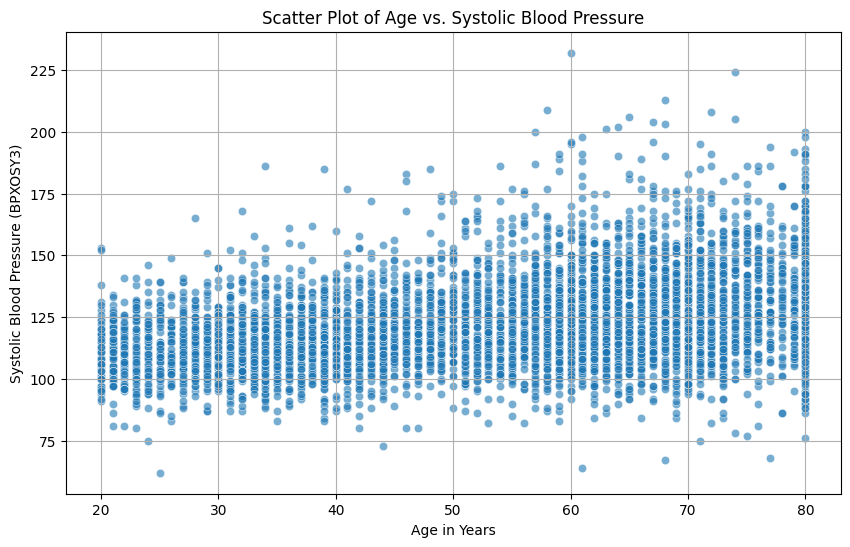

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=q3_clean_df, x='RIDAGEYR', y='BPXOSY3', alpha=0.6)
plt.title('Scatter Plot of Age vs. Systolic Blood Pressure')
plt.xlabel('Age in Years')
plt.ylabel('Systolic Blood Pressure (BPXOSY3)')
plt.grid(True)
plt.show()

Q3
---
Increased age correlates with increased blood pressure. As seen with the
scatterplot, blood pressure average increases with age. When comparing marital status correlation, it seems that unmarried individuals have a lower mean blood pressure compared to other groups. However, group 2 which are divorced, widowed or seperated, have a higher mean blood pressure.

KEEP IN MIND: Unmarried Individuals are younger compared to both the Married Group and Divorced Seperated Group.

Question 4: "Is there a correlation between self-reported weight and minutes of sedentary behavior?"
---



DATA

WHD020 - Self reported weight
| Code | Descript | Count |
|---|---|---|
|63 to 530| range of values| 8358 |

PAD680 - sedentary behavior time
| Code | Descript | Count |
|---|---|---|
|0 to 1380| range of values| 8065 |

not to self- clean data in both files

In [ ]:
df = pd.read_sas('PAQ_L.xpt')
print(df.head())

       SEQN       PAD790Q PAD790U  PAD800       PAD810Q PAD810U  PAD820  \
0  130378.0  3.000000e+00    b'W'    45.0  3.000000e+00    b'W'    45.0   
1  130379.0  4.000000e+00    b'W'    45.0  3.000000e+00    b'W'    45.0   
2  130380.0  1.000000e+00    b'W'    20.0  5.397605e-79     b''     NaN   
3  130384.0  5.397605e-79     b''     NaN  5.397605e-79     b''     NaN   
4  130385.0  1.000000e+00    b'D'    90.0  1.000000e+00    b'W'    60.0   

   PAD680  
0   360.0  
1   480.0  
2   240.0  
3    60.0  
4   180.0  


In [ ]:
q4_p1_df = df[['SEQN','PAD680']]
print(q4_p1_df)
#print(q4_p1_df['PAD680'].value_counts())

          SEQN  PAD680
0     130378.0   360.0
1     130379.0   480.0
2     130380.0   240.0
3     130384.0    60.0
4     130385.0   180.0
...        ...     ...
8148  142305.0   480.0
8149  142307.0   480.0
8150  142308.0   600.0
8151  142309.0   240.0
8152  142310.0   360.0

[8153 rows x 2 columns]


In [ ]:
# Remove null/missing values 7777, 9999, and NaN (missing) from PAD680
q4_p1_df_filtered = q4_p1_df[~q4_p1_df['PAD680'].isin([0.0, 7777.0, 9999.0])].dropna(subset=['PAD680'])
print(q4_p1_df_filtered.head())
# print(q4_p1_df_filtered['PAD680'].value_counts())

       SEQN  PAD680
0  130378.0   360.0
1  130379.0   480.0
2  130380.0   240.0
3  130384.0    60.0
4  130385.0   180.0


In [ ]:
df = pd.read_sas('WHQ_L.xpt')
print(df.head())

       SEQN  WHD010  WHD020  WHD050  WHQ070
0  130378.0    71.0   190.0   200.0     1.0
1  130379.0    70.0   220.0   220.0     2.0
2  130380.0    60.0   150.0   165.0     1.0
3  130384.0    68.0   204.0   212.0     1.0
4  130385.0    70.0   240.0   240.0     2.0


In [ ]:
q4_p2_df = df[['SEQN','WHD020']]
print(q4_p2_df)

          SEQN  WHD020
0     130378.0   190.0
1     130379.0   220.0
2     130380.0   150.0
3     130384.0   204.0
4     130385.0   240.0
...        ...     ...
8496  142305.0   137.0
8497  142307.0   206.0
8498  142308.0   174.0
8499  142309.0   200.0
8500  142310.0   157.0

[8501 rows x 2 columns]


In [ ]:
# Remove null/missing values 7777, 9999, and NaN (missing) from WHD020
q4_p2_df_filtered = q4_p2_df[~q4_p2_df['WHD020'].isin([0.0, 7777.0, 9999.0])].dropna(subset=['WHD020'])
print(q4_p2_df_filtered.head())
# print(q4_p1_df_filtered['PAD680'].value_counts())

       SEQN  WHD020
0  130378.0   190.0
1  130379.0   220.0
2  130380.0   150.0
3  130384.0   204.0
4  130385.0   240.0


In [ ]:
merged_q4_df = pd.merge(q4_p1_df_filtered, q4_p2_df_filtered, on='SEQN', how='inner')
print(merged_q4_df.head())

       SEQN  PAD680  WHD020
0  130378.0   360.0   190.0
1  130379.0   480.0   220.0
2  130380.0   240.0   150.0
3  130384.0    60.0   204.0
4  130385.0   180.0   240.0


In [ ]:
q4_clean_df = merged_q4_df.dropna(subset=['WHD020', 'PAD680']).copy()

In [ ]:
# Dependent variable (Self-reported weight)
y = q4_clean_df['WHD020']
X = q4_clean_df['PAD680']
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 WHD020   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     198.3
Date:                Sun, 02 Nov 2025   Prob (F-statistic):           1.70e-44
Time:                        18:38:28   Log-Likelihood:                -42003.
No. Observations:                7954   AIC:                         8.401e+04
Df Residuals:                    7952   BIC:                         8.402e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        167.6684      1.065    157.501      0.0

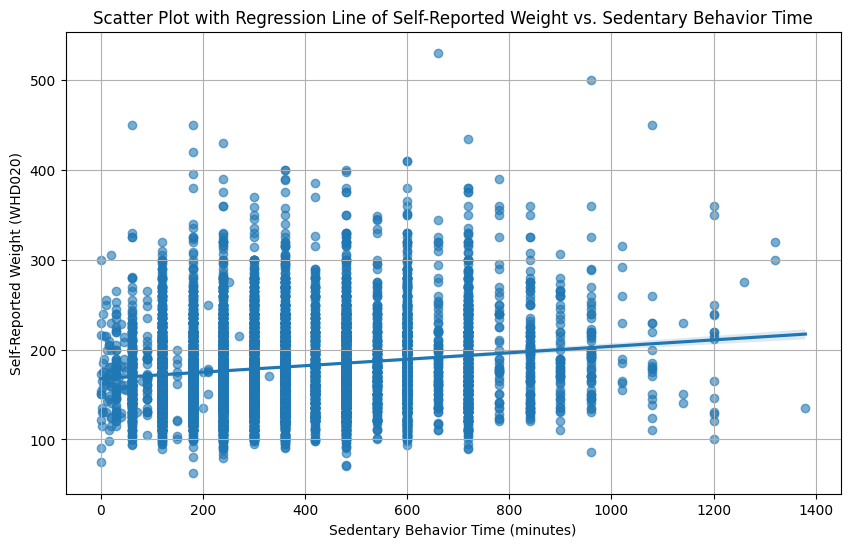

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data=q4_clean_df, x='PAD680', y='WHD020', scatter_kws={'alpha':0.6})
plt.title('Scatter Plot with Regression Line of Self-Reported Weight vs. Sedentary Behavior Time')
plt.xlabel('Sedentary Behavior Time (minutes)')
plt.ylabel('Self-Reported Weight (WHD020)')
plt.grid(True)
plt.show()

Q4

---
Increased sedentary behavior time correlates with increased average weight.


Question 5: Experimental Q- SEE SEPERATE NOTEBOOK FOR FULL CHECKS
---
Is there a correlation with age and marital status?


Data : DEMO data

RIDAGEYR - Age

| Code |  Value | Count |
|---|---|---|
| 0 - 79| ages between 0 to 79 | 11408 |
| 80 | individuals of 80 or older | 525 |

DMDMARTZ - marital stat
| Code | Descript | Count |
|---|---|---|
|1| Married/living with partner | 4136 |
|2| Widow/Divorce/Seperated|2022|
|3|Never Married|1625|

In [4]:
pd = pd.read_sas('DEMO_L.xpt')
print(pd.head())

       SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  \
0  130378.0      12.0       2.0       1.0      43.0       NaN       5.0   
1  130379.0      12.0       2.0       1.0      66.0       NaN       3.0   
2  130380.0      12.0       2.0       2.0      44.0       NaN       2.0   
3  130381.0      12.0       2.0       2.0       5.0       NaN       5.0   
4  130382.0      12.0       2.0       1.0       2.0       NaN       3.0   

   RIDRETH3  RIDEXMON  RIDEXAGM  ...  DMDHRGND  DMDHRAGZ  DMDHREDZ  DMDHRMAZ  \
0       6.0       2.0       NaN  ...       NaN       NaN       NaN       NaN   
1       3.0       2.0       NaN  ...       NaN       NaN       NaN       NaN   
2       2.0       1.0       NaN  ...       NaN       NaN       NaN       NaN   
3       7.0       1.0      71.0  ...       2.0       2.0       2.0       3.0   
4       3.0       2.0      34.0  ...       2.0       2.0       3.0       1.0   

   DMDHSEDZ      WTINT2YR      WTMEC2YR  SDMVSTRA  SDMVPSU  INDFMPIR

In [5]:
df = pd[['SEQN','RIDAGEYR','DMDMARTZ']]
print(df)

           SEQN  RIDAGEYR  DMDMARTZ
0      130378.0      43.0       1.0
1      130379.0      66.0       1.0
2      130380.0      44.0       1.0
3      130381.0       5.0       NaN
4      130382.0       2.0       NaN
...         ...       ...       ...
11928  142306.0       9.0       NaN
11929  142307.0      49.0       3.0
11930  142308.0      50.0       1.0
11931  142309.0      40.0       2.0
11932  142310.0      80.0       1.0

[11933 rows x 3 columns]


In [6]:
q5_df = df.dropna(subset=['RIDAGEYR', 'DMDMARTZ'])
print(q5_df.head())
print(q5_df.value_counts())

       SEQN  RIDAGEYR  DMDMARTZ
0  130378.0      43.0       1.0
1  130379.0      66.0       1.0
2  130380.0      44.0       1.0
6  130384.0      43.0       3.0
7  130385.0      65.0       1.0
SEQN      RIDAGEYR  DMDMARTZ
142289.0  68.0      1.0         1
142288.0  54.0      1.0         1
142287.0  70.0      1.0         1
142286.0  70.0      1.0         1
142285.0  60.0      1.0         1
                               ..
130385.0  65.0      1.0         1
130384.0  43.0      3.0         1
130380.0  44.0      1.0         1
130379.0  66.0      1.0         1
130378.0  43.0      1.0         1
Name: count, Length: 7792, dtype: int64


In [7]:
# Remove null/missing values 0.0 and NaN (missing) from AGE !!!! may not be necessary
#q5_p1_df_filtered = q5_df[~q5_df['RIDAGEYR'].isin([0.0])].dropna(subset=['RIDAGEYR'])
#print(q5_p1_df_filtered.head())
# print(q4_p1_df_filtered['PAD680'].value_counts())
#### cleaning age category is not necessary since there is no missing values

In [8]:
# Remove null/missing values 77, 99, and NaN (missing) from Marriage stat !!!!
q5_df_filtered = q5_df[~q5_df['DMDMARTZ'].isin([0.0, 77, 99])].dropna(subset=['DMDMARTZ'])
print(q5_df_filtered.head())
# print(q4_p1_df_filtered['PAD680'].value_counts())

       SEQN  RIDAGEYR  DMDMARTZ
0  130378.0      43.0       1.0
1  130379.0      66.0       1.0
2  130380.0      44.0       1.0
6  130384.0      43.0       3.0
7  130385.0      65.0       1.0


In [9]:
q5_true_df = q5_df_filtered.dropna(subset=['DMDMARTZ', 'RIDAGEYR']).copy()

In [22]:
y = q5_true_df['DMDMARTZ']
X = q5_true_df[['RIDAGEYR']]
# Add a constant to the independent variable matrix (for the intercept)
X = sm.add_constant(X)

In [23]:
model_5 = sm.OLS(y, X).fit()
print(model_5.summary())

                            OLS Regression Results                            
Dep. Variable:               DMDMARTZ   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     439.9
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           4.71e-95
Time:                        14:13:03   Log-Likelihood:                -9069.2
No. Observations:                7783   AIC:                         1.814e+04
Df Residuals:                    7781   BIC:                         1.816e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2420      0.028     79.159      0.0

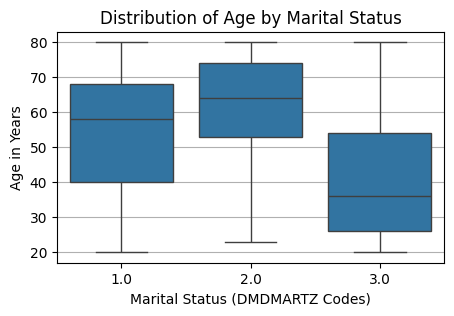

In [32]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=q5_true_df, x='DMDMARTZ', y='RIDAGEYR')
plt.title('Distribution of Age by Marital Status')
plt.xlabel('Marital Status (DMDMARTZ Codes)')
plt.ylabel('Age in Years')
plt.grid(axis='y')
plt.show()

Recategorized data
DMDMARTZ - marital stat
| Code | Descript | Count |
|---|---|---|
|1| Married/living with partner | 4136 |
|2| Widow/Divorce/Seperated|2022|
|3|Never Married|1625|

Changed to

DMDMARTZ - marital stat
| Code | Descript | Count |
|---|---|---|
|1| Married or had Married | 6158 |
|3|Never Married|1625|

In [14]:
#### USE THIS FOR BOX PLOT
def recategorize_marital_status_new(marital_code):
    if marital_code in [1.0, 2.0]:
        return 'Had Married or is Married'
    elif marital_code == 3.0:
        return 'Never Married'
    else:
        return 'Unknown' # Handle any other potential values

q5_df_filtered['DMDMARTZ_recat_new'] = q5_df_filtered['DMDMARTZ'].apply(recategorize_marital_status_new)

print(q5_df_filtered[['DMDMARTZ', 'DMDMARTZ_recat_new']].head())
print(q5_df_filtered['DMDMARTZ_recat_new'].value_counts())

   DMDMARTZ         DMDMARTZ_recat_new
0       1.0  Had Married or is Married
1       1.0  Had Married or is Married
2       1.0  Had Married or is Married
6       3.0              Never Married
7       1.0  Had Married or is Married
DMDMARTZ_recat_new
Had Married or is Married    6158
Never Married                1625
Name: count, dtype: int64


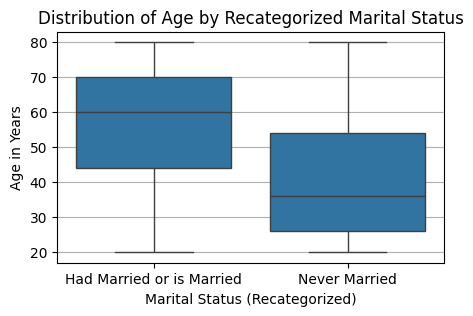

In [29]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=q5_proper_df, x='DMDMARTZ_recat_new', y='RIDAGEYR')
plt.title('Distribution of Age by Recategorized Marital Status')
plt.xlabel('Marital Status (Recategorized)')
plt.ylabel('Age in Years')
plt.grid(axis='y')
plt.show()

### book markplace holder at work, if at work ignore below line

https://github.com/hantswilliams/HHA-507-2025/blob/main/assignments/assignment4_files/assignment_inferential.md

PLACE HOLDER TO WHERE TO LEAVE OFF

https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/PAQ_L.htm

https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/WHQ_L.htm

https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/DEMO_L.htm

https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/PAQ_L.htm

https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/BPXO_L.htm#BPXOSY3

